In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 데이터 로드

In [2]:
data = pd.read_csv('data/titanic_train.csv')

In [17]:
data['Cabin'].head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 크기 확인

In [4]:
data.shape

(891, 12)

## 대략적인 컬럼 정보 확인

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Null값을 포함한 Column 확인

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Null 값을 간단히 채워주기

In [10]:
data['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [12]:
data.groupby(['Sex'])['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [3]:
data['Age'].fillna(np.mean(data['Age']), inplace=True)
data['Cabin'].fillna('N', inplace=True)
data['Embarked'].fillna('N', inplace=True)

## Null 데이터 확인

In [4]:
print('데이터 세트 Null 값 개수\n', data.isnull().sum())

데이터 세트 Null 값 개수
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## String으로 된 값들 분포 확인

In [5]:
print(' Sex 값 분포 :\n', data['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', data['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', data['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
C118             1
E58              1
B3               1
A34              1
C50              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


## Sex, Embarked는 문제없지만 Cabin이 좀 문제가 있어보이니까 첫번째 문자만 따서 새로 넣어주자

In [6]:
def first_string(data):
    data = data[:1]
    return data

In [7]:
data['Cabin'] = data['Cabin'].apply(first_string)

In [8]:
data['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


## 성별에 따라 생존여부 확인하기

In [14]:
pd.DataFrame(data.groupby(["Sex",'Survived'])['Survived'].count())

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

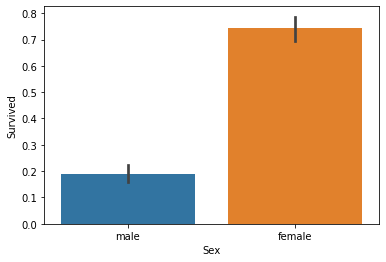

In [15]:
sns.barplot(x = 'Sex', y = 'Survived', data=data)

## Pclass별 생존률 보기

In [16]:
pd.DataFrame(data.groupby(['Pclass','Survived'])['Survived'].count())

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

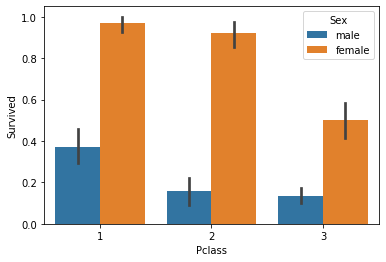

In [17]:
sns.barplot(x = 'Pclass', y = 'Survived', hue='Sex', data = data)

# 해석 결과 : 남성의 경우 이, 삼등급의 탑승객의 생존률이 비슷하지만 일등급 탑승객의 생존률이 높다

# 해석 결과 : 여성의 경우, 일, 이등급의 탑승객의 생존률이 비슷하지만 삼등급으로 가면 확 낮아진다.

## 나이에 따라 생존률을 보기위해 나이를 category화 시킨다.

In [23]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

In [24]:
data['Age_cat'] = data['Age'].apply(get_category)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


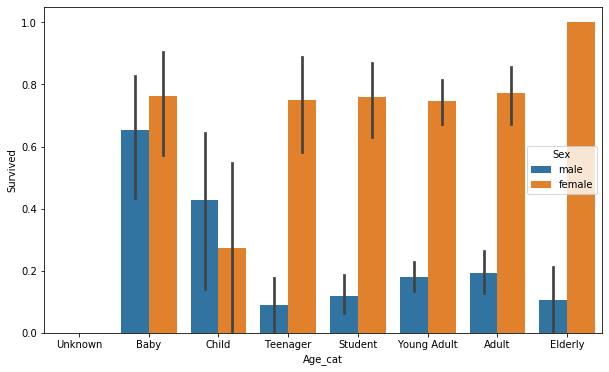

In [21]:
plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = data, order=group_names)

## Age 칼럼 제거하기

In [25]:
data.drop(['Age'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,title,Family_size,Age_cat
0,0,3,1,7.2500,7,3,1,2,Student
1,1,1,0,71.2833,2,0,2,2,Adult
2,1,3,0,7.9250,7,3,0,1,Young Adult
3,1,1,0,53.1000,2,3,2,2,Young Adult
4,0,3,1,8.0500,7,3,1,1,Young Adult


# Name에선 중요한 정보가 없을까

In [23]:
pd.DataFrame(data['Name'])

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


## 이런 자료들을 통해 탈출 우선 순위의 고려사항이 될 수 있으니 일단 호칭만 추출해보자.

## . 직전에 있는 문자열만 추출해주기 위해 다음과 같은 문법을 사용해본다.

## 추출 후 원본데이터에 title이라는 컬럼으로 저장해줬다.

## 더이상 Name 컬럼은 필요없으니 지워주도록 하자.

In [9]:
data['title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
data.drop(['Name'], axis = 1, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,N,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,N,S,Mr


In [11]:
title_cat = ['Mr', 'Miss', 'Mrs']

In [10]:
def get_title_cat(data):
    title_cat = ['Mr', 'Mrs', 'Miss']
    if data not in title_cat:
        return 'Others'
    else:
        return data

In [12]:
data['title'].apply(lambda x : get_title_cat(x))

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
886    Others
887      Miss
888      Miss
889        Mr
890        Mr
Name: title, Length: 891, dtype: object

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
 10  Age_cat      891 non-null    object 
 11  title        891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


## title 칼럼 분포 확인

In [26]:
pd.DataFrame(data['title'].value_counts())

,title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Mlle,2
Col,2
Jonkheer,1


## 분포가 엄청 다양해보이는데 두드러지는건 Mr, Miss, Mrs가 많으므로 나머지는 Others로 묶어줘보자

In [13]:
def title_cat(data):
    cat = ['Mr', 'Miss', 'Mrs']
    t_cat = ''
    if data not in cat:
        t_cat = 'Others'
        return t_cat
    else:
        return data

In [14]:
data['title'] = data['title'].apply(lambda x : title_cat(x))

In [15]:
data['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Others     67
Name: title, dtype: int64

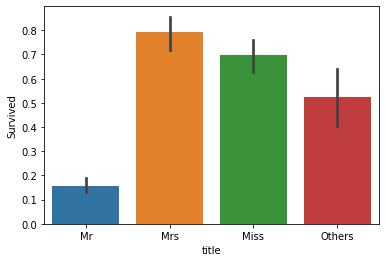

In [30]:
sns.barplot(x = 'title', y = 'Survived', data = data)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,title
0,1,0,3,male,1,0,A/5 21171,7.2500,N,S,Student,Mr
1,2,1,1,female,1,0,PC 17599,71.2833,C,C,Adult,Mrs
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult,Miss
3,4,1,1,female,1,0,113803,53.1000,C,S,Young Adult,Mrs
4,5,0,3,male,0,0,373450,8.0500,N,S,Young Adult,Mr


## SibSp와 Parch를 합해 Family_size라는 변수를 생성해준다.

## 더이상 SibSp와 Parch는 필요없으므로 지워준다.

In [16]:
# 본인을 포함해야하므로 + 1
data["Family_size"] = data['SibSp']+data["Parch"] + 1
data.drop(['SibSp', 'Parch'], axis = 1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,Family_size
0,1,0,3,male,22.0,A/5 21171,7.2500,N,S,Mr,2
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,Mrs,2
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,N,S,Miss,1
3,4,1,1,female,35.0,113803,53.1000,C,S,Mrs,2
4,5,0,3,male,35.0,373450,8.0500,N,S,Mr,1


## SibSp와 Parch는 이제 드랍해주자.

## 가족의 크기에 따라 생존률의 차이는 없는것일까?

In [33]:
data.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Age_cat,title,Family_size
0,1,0,3,male,A/5 21171,7.2500,N,S,Student,Mr,2
1,2,1,1,female,PC 17599,71.2833,C,C,Adult,Mrs,2
2,3,1,3,female,STON/O2. 3101282,7.9250,N,S,Young Adult,Miss,1
3,4,1,1,female,113803,53.1000,C,S,Young Adult,Mrs,2
4,5,0,3,male,373450,8.0500,N,S,Young Adult,Mr,1


## 가족 사이즈에 따른 생존여부

In [34]:
pd.DataFrame(data.groupby(["Family_size", 'Survived'])['Survived'].count())

Survived
Family_size Survived          
1           0              374
            1              163
2           0               72
            1               89
3           0               43
            1               59
4           0                8
            1               21
5           0               12
            1                3
6           0               19
            1                3
7           0                8
            1                4
8           0                6
11          0                7

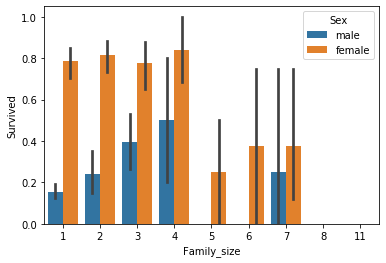

In [35]:
sns.barplot(x = 'Family_size', y = 'Survived', data = data, hue = 'Sex')

# Family 사이즈가 클수록 생존률이 떨어지는 모습을 보여준다.
# 부양할 가족들이 많아서 챙기느라 그럴수도 있겠다고 생각한다.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Ticket       891 non-null    object 
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    object 
 7   Embarked     891 non-null    object 
 8   Age_cat      891 non-null    object 
 9   title        891 non-null    object 
 10  Family_size  891 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 76.7+ KB


In [94]:
data.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Age_cat,title,Family_size
0,1,0,3,male,A/5 21171,7.2500,N,S,Student,Mr,2
1,2,1,1,female,PC 17599,71.2833,C,C,Adult,Mrs,2
2,3,1,3,female,STON/O2. 3101282,7.9250,N,S,Young Adult,Miss,1
3,4,1,1,female,113803,53.1000,C,S,Young Adult,Mrs,2
4,5,0,3,male,373450,8.0500,N,S,Young Adult,Mr,1


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Ticket       891 non-null    object 
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    object 
 7   Embarked     891 non-null    object 
 8   Age_cat      891 non-null    object 
 9   title        891 non-null    object 
 10  Family_size  891 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 76.7+ KB


In [37]:
data['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [38]:
label_dic = {'N' : 0, 'C' : 1, 'B' : 2, 'D' : 3, 'E' : 4, 'A' : 5, 'F' : 6, 'G' : 7, 'T' : 8 }
print(label_dic)

{'N': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5, 'F': 6, 'G': 7, 'T': 8}


## 말나온김에 Cabin을 라벨링 시켜보자

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Cabin'])
data['Cabin'] = le.transform(data['Cabin'])
print(data['Cabin'])

0      7
1      2
2      7
3      2
4      7
      ..
886    7
887    1
888    7
889    2
890    7
Name: Cabin, Length: 891, dtype: int32


## 나머지(Sex, Embarked, title, Age_cat)도 라벨링 해주자

In [21]:
# from sklearn import preprocessing

def feature_labeling(df):
    columns = ['Sex', 'Embarked', 'title', 'Age_cat']
    
    for feature in columns:
        le = preprocessing.LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

In [26]:
data = feature_labeling(data)
data.head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,title,Family_size,Age_cat
0,0,3,1,7.2500,7,3,1,2,4
1,1,1,0,71.2833,2,0,2,2,0
2,1,3,0,7.9250,7,3,0,1,6
3,1,1,0,53.1000,2,3,2,2,6
4,0,3,1,8.0500,7,3,1,1,6


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Fare         891 non-null    float64
 4   Cabin        891 non-null    int32  
 5   Embarked     891 non-null    int64  
 6   title        891 non-null    int64  
 7   Family_size  891 non-null    int64  
 8   Age_cat      891 non-null    int32  
dtypes: float64(1), int32(2), int64(6)
memory usage: 55.8 KB


In [28]:
data.head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,title,Family_size,Age_cat
0,0,3,1,7.2500,7,3,1,2,4
1,1,1,0,71.2833,2,0,2,2,0
2,1,3,0,7.9250,7,3,0,1,6
3,1,1,0,53.1000,2,3,2,2,6
4,0,3,1,8.0500,7,3,1,1,6


## 불필요한 칼럼(PassengerId, Ticket) 제거

In [19]:
data.drop(['PassengerId', 'Ticket'], axis = 1, inplace=True)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,Family_size
0,0,3,male,22.0,7.2500,7,S,Mr,2
1,1,1,female,38.0,71.2833,2,C,Mrs,2
2,1,3,female,26.0,7.9250,7,S,Miss,1
3,1,1,female,35.0,53.1000,2,S,Mrs,2
4,0,3,male,35.0,8.0500,7,S,Mr,1


## 모델에 학습시킬 독립변수, 종속변수를 나눠준다.

In [29]:
features = data.columns.difference(['Survived'])
X = data[features]
y = data['Survived']

In [30]:
X.head()

,Age_cat,Cabin,Embarked,Family_size,Fare,Pclass,Sex,title
0,4,7,3,2,7.2500,3,1,1
1,0,2,0,2,71.2833,1,0,2
2,6,7,3,1,7.9250,3,0,0
3,6,2,3,2,53.1000,1,0,2
4,6,7,3,1,8.0500,3,1,1


In [31]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 모델의 성능을 검정하기위해 학습, 검증 데이터로 나누어준다.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

## 1번 결정트리

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=101)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print("DecisionTreeClassifier 정확도:{:.4f}".format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도:0.7765


## 2번 랜덤포레스트

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=101)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print("RandomForestClassifier 정확도:{:.4f}".format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.7989


## 3번 로지스틱회귀

In [47]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test,lr_pred)))

LogisticRegression 정확도: 0.7765


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 101)
rf_clf = RandomForestClassifier(random_state = 101)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print("DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print("RandomForestClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7765
RandomForestClassifier 정확도: 0.7989
LogisticRegression 정확도: 0.7765


## 모델의 성능을 조금 더 살펴보기 위해 교차검증 실시

## 1. KFold

In [37]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds): #Classifier와 fold수를 넘겨받는 함수 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X)):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        clf.fit(X_train, y_train)
        
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [38]:
exec_kfold(rf_clf, 5)

교차 검증 0 정확도: 0.8156
교차 검증 1 정확도: 0.7640
교차 검증 2 정확도: 0.8146
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8202
평균 정확도: 0.8002


## 2. cross_val_score

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X, y, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7191
교차 검증 2 정확도: 0.8034
교차 검증 3 정확도: 0.8090
교차 검증 4 정확도: 0.8315
평균 정확도: 0.7935


# 알고리즘을 조금 더 평가하기 위해서 교차 검증 실시

## 1번으로 KFold

## 모듈화시키기 위해서 함수로 만들어주자.

In [40]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds): #Classifier와 fold수를 넘겨받는 함수 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X)):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        clf.fit(X_train, y_train)
        
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [41]:
exec_kfold(dt_clf, 5)

교차 검증 0 정확도: 0.7821
교차 검증 1 정확도: 0.7416
교차 검증 2 정확도: 0.8146
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8315
평균 정확도: 0.7890


## 2번으로 cross_val_score

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X, y, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7191
교차 검증 2 정확도: 0.8034
교차 검증 3 정확도: 0.8090
교차 검증 4 정확도: 0.8315
평균 정확도: 0.7935


## 3번으로 GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' :[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8174
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8101
